In [1]:
# import packages 
import pandas as pd
import json
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
import matplotlib.pyplot as plt
import pandas_profiling as pdf
import numpy as np
import statsmodels.api as sm

In [277]:
# set constants
coin_metrics_url = 'https://api.coinmetrics.io/v2'
coin_metrics_api_key = 'api_key=DlgTDcpDmRS8H5gNnila' #append to every request

In [18]:
#load btc data
btc_df = pd.read_csv('btc.csv')
btc_df.shape

(2362, 8)

In [11]:
#load reference data
metric_reference = pd.read_csv('reference.csv')
metric_reference.set_index('id', inplace=True)
metric_reference.loc['AdrActCnt', 'description']
metric_reference

,name,category,subcategory,description
id,,,,
AdrActCnt,"Addresses, active, count",Addresses,Activity,The sum count of unique addresses that were ac...
AdrActRecCnt,"Addresses, active, received, count",Addresses,Activity,The sum count of unique addresses that were ac...
AdrActSentCnt,"Addresses, active, sent, count",Addresses,Activity,The sum count of unique addresses that were ac...
AdrBalAdjCnt,"Addresses, with balance, adjusted, count",Addresses,Balance,The sum count of unique addresses holding at l...
AdrBalCnt,"Addresses, any balance, count",Addresses,Balance,The sum count of unique addresses holding any ...
BlkCnt,"Block, count",Blockchain / ledger,Blocks,The sum count of blocks created that day that ...
BlkIntMean,"Block, interval, mean",Blockchain / ledger,Blocks,The mean time (in seconds) between all the blo...
BlkSizeMeanByte,"Block, size, mean, bytes",Blockchain / ledger,Blocks,The mean size (in bytes) of all blocks created...
CapAct1yrUSD,"Capitalization, active supply, 1 yr, USD",Market,Market Capitalization,The sum USD value of all active native units i...


In [4]:
target = 'OneDayReturn'
index = 'times'

In [17]:
#clean columns
btc_df['times'] = pd.to_datetime(btc_df['times'])
btc_df.set_index('times', inplace=True)
tick_bar_sample(btc_df)

KeyError: 'times'

In [7]:
def dollar_bar_sample():
    #TxTfrValUSD
    pass

In [12]:
def volume_bar_sample(data, vol_key, price_key, time_key):
    #TxTfrValNtv
   
    
    pass 

In [16]:
def tick_bar_sample(data, price_key):
    #do we have to sample daily ticks here? what is the concept of a tick in crypto?
    '''set b feature (tick imbalance function)
    b(t) = b(t-1) if price change is zero
    b(t) = abs(return)/return if change is non-zero
    Total Tick Imbalance at time T: Theta(T) = SUM b(t) from t = 1 to T
    Expected value of Theta(T) at t = 0
    E0T = Expected size of the tick bar 
        (calc'd as exponentially weighted moving average of of T values from prior bars)
    B0T = Expected Probabilty of up(?) tick at beginning of bar 
        (calc'd as exponentially weighted moving average of of b(t) values from prior bars)
        consider window range, probability = SUM b(s)/count of elements in set defining T window
    Find minimum value for T such that:
        |Theta(T)| >= E0T * B0T
    Create contiguous range of these values
    '''
    
    #step 1 - diff DF
    diff = data.diff()
    diff
    #step 2 - add b
    #diff['b(t)'] = diff[lambda x ]
    pass

In [282]:
#add lags
btc_df['NextDayReturn'] = btc_df['OneDayReturn'].shift(-1)

In [283]:
btc_df = btc_df.dropna()

In [284]:
#bottom days of returns
btc_df_sorted_returns_desc = btc_df.sort_values(by=['OneDayReturn'])
btc_df_sorted_returns_desc.head(30)

,Unnamed: 0,AdrActCnt,AdrActRecCnt,AdrActSentCnt,AdrBalAdjCnt,AdrBalCnt,BlkCnt,BlkIntMean,BlkSizeMeanByte,CapAct1yrUSD,...,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,UTXOCnt,VelAct1yr,VelActAdj1yr,VelCur1yr,VelCurAdj1yr,OneDayReturn,NextDayReturn
times,,,,,,,,,,,,,,,,,,,,,
2013-04-11 00:00:00+00:00,1559,124532,96413,76254,407047,1420618,160,539.427673,2.175477e+05,5.397073e+08,...,2.197201,2.344215e+06,2.019895e+08,4381855,165.662369,20.385672,94.143180,11.584840,-0.526789,0.318359
2011-06-11 00:00:00+00:00,889,23839,20661,14859,146818,147214,252,340.302789,1.763069e+04,5.978130e+07,...,15.294602,1.481859e+06,2.266444e+07,273448,17.181713,7.022164,10.318806,4.217295,-0.357937,0.204845
2011-08-06 00:00:00+00:00,945,19507,16781,9011,206209,400223,122,707.826446,2.519032e+04,2.852115e+07,...,1.436146,3.780298e+05,2.392520e+06,746489,37.031449,8.932731,23.856405,5.754645,-0.351322,0.247308
2010-11-08 00:00:00+00:00,674,1570,571,1193,58352,58355,275,314.543796,8.440000e+02,4.802980e+05,...,12.150000,4.999737e+05,1.214936e+05,62735,7.773019,4.109993,3.391758,1.793396,-0.285294,-0.135802
2011-10-17 00:00:00+00:00,1017,14480,11547,8393,222579,539968,118,723.393162,2.348311e+04,1.324627e+07,...,2.901467,4.938937e+05,1.308221e+06,1121101,39.986562,9.581338,26.717768,6.401950,-0.272088,-0.075364
2014-01-27 00:00:00+00:00,1850,171032,151609,94680,781894,2544294,174,492.716763,1.878684e+05,5.715976e+09,...,17.754672,9.186475e+05,6.910663e+08,8659069,52.927889,14.727953,32.643214,9.083448,-0.233104,0.139264
2011-11-14 00:00:00+00:00,1045,13220,10412,7986,229265,550441,143,601.704225,1.761331e+04,1.165501e+07,...,2.567272,3.379287e+05,7.678506e+05,1184303,40.615637,9.867436,27.176883,6.602534,-0.233005,0.018794
2013-11-19 00:00:00+00:00,1781,205240,167526,145788,607685,2096298,161,532.431250,3.096243e+05,4.024314e+09,...,56.113315,2.121936e+06,1.190689e+09,7468340,60.240481,16.423218,35.963607,9.804672,-0.230985,0.083525
2013-04-10 00:00:00+00:00,1558,132897,106002,78853,406536,1414758,191,438.584211,1.666225e+05,1.136409e+09,...,9.222332,2.791397e+06,5.082743e+08,4360526,166.152972,20.384165,94.115658,11.546402,-0.216038,-0.526789


In [285]:
#top days of returns
btc_df_sorted_returns_asc = btc_df.sort_values(by=['OneDayReturn'], ascending=False)
btc_df_sorted_returns_asc.head(30)

,Unnamed: 0,AdrActCnt,AdrActRecCnt,AdrActSentCnt,AdrBalAdjCnt,AdrBalCnt,BlkCnt,BlkIntMean,BlkSizeMeanByte,CapAct1yrUSD,...,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,UTXOCnt,VelAct1yr,VelActAdj1yr,VelCur1yr,VelCurAdj1yr,OneDayReturn,NextDayReturn
times,,,,,,,,,,,,,,,,,,,,,
2011-05-10 00:00:00+00:00,857,7096,5490,4407,103048,103115,183,473.027473,7.853546e+03,1.913837e+07,...,8.309827,5.662663e+05,3.179443e+06,168818,15.038005,6.484576,8.321842,3.588482,0.458528,-0.046033
2013-11-18 00:00:00+00:00,1780,171380,146066,116397,608839,2092136,156,543.445161,2.604503e+05,5.219284e+09,...,72.967741,2.307645e+06,1.683836e+09,7493465,60.285180,16.422571,35.907486,9.781728,0.451620,-0.230985
2010-11-06 00:00:00+00:00,672,588,437,284,58856,58859,218,392.917051,5.081789e+02,7.188288e+05,...,18.714763,1.254200e+05,4.694410e+04,63214,7.693466,3.998635,3.280533,1.705038,0.439597,-0.091626
2013-04-17 00:00:00+00:00,1565,105380,86724,56579,419159,1462733,171,505.000000,1.646768e+05,5.970581e+08,...,1.148075,1.789640e+06,1.684185e+08,4602309,163.792226,20.343658,94.066491,11.683439,0.402141,0.142061
2011-09-11 00:00:00+00:00,981,15739,13099,9498,216425,492199,125,684.064516,2.425616e+04,3.079176e+07,...,6.443057,1.023266e+06,6.592963e+06,1004507,39.957235,9.486750,26.346491,6.255252,0.374332,-0.058372
2011-02-01 00:00:00+00:00,759,1901,1329,1249,69012,69029,164,524.521472,2.586994e+03,1.900975e+06,...,3.335000,1.279274e+05,9.274737e+04,82886,8.682870,4.708040,4.306305,2.334972,0.330835,0.020690
2013-04-12 00:00:00+00:00,1560,102302,81170,62265,408738,1424926,173,494.081395,1.613284e+05,7.126899e+08,...,4.119324,1.758027e+06,1.997058e+08,4408138,165.499721,20.422058,94.167366,11.619907,0.318359,-0.178610
2011-06-03 00:00:00+00:00,881,17741,14911,11455,134671,134957,202,428.845771,1.992625e+04,5.253456e+07,...,14.214833,6.086185e+05,8.565753e+06,239264,16.339907,6.932176,9.496792,4.028997,0.300445,0.284540
2011-08-09 00:00:00+00:00,948,23592,20564,12142,205665,411512,146,585.875862,2.822018e+04,4.607893e+07,...,5.089602,2.293014e+06,2.334105e+07,765577,37.696725,9.043420,24.323404,5.835169,0.299024,0.001005


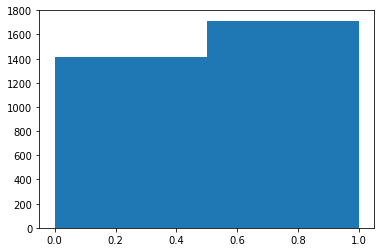

In [286]:
return_directions = (btc_df['OneDayReturn'] > 0).astype(int)
#return_directions
plt.hist(x = return_directions, bins=2)
plt.show()

In [287]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3131 entries, 2010-10-16 00:00:00+00:00 to 2019-05-12 00:00:00+00:00
Data columns (total 62 columns):
Unnamed: 0            3131 non-null int64
AdrActCnt             3131 non-null int64
AdrActRecCnt          3131 non-null int64
AdrActSentCnt         3131 non-null int64
AdrBalAdjCnt          3131 non-null int64
AdrBalCnt             3131 non-null int64
BlkCnt                3131 non-null int64
BlkIntMean            3131 non-null float64
BlkSizeMeanByte       3131 non-null float64
CapAct1yrUSD          3131 non-null float64
CapFutExp10yrUSD      3131 non-null float64
CapMVRVCur            3131 non-null float64
CapMrktCurUSD         3131 non-null float64
CapRealUSD            3131 non-null float64
DiffMean              3131 non-null float64
FeeMeanNtv            3131 non-null float64
FeeMeanUSD            3131 non-null float64
FeeMedNtv             3131 non-null float64
FeeMedUSD             3131 non-null float64
FeeRevPct             3

In [288]:
c = btc_df.corr().abs()[['OneDayReturn','NextDayReturn']]
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

NextDayReturn  NextDayReturn         1.000000
OneDayReturn   OneDayReturn          1.000000
               CapMVRVCur            0.245418
               NVTAdj90              0.200830
NextDayReturn  CapMVRVCur            0.114699
               BlkCnt                0.075511
               IssContPctDay         0.075104
               IssContPctAnn         0.075104
OneDayReturn   TxTfrValDayDstMean    0.074688
NextDayReturn  NVTAdj90              0.074573
               SplyAct1yr            0.072185
OneDayReturn   SplyAct1yr            0.071784
NextDayReturn  BlkIntMean            0.069303
OneDayReturn   IssContPctDay         0.067310
               IssContPctAnn         0.067310
               SplyExpFut10yr        0.063597
               SplyCur               0.063485
NextDayReturn  SplyExpFut10yr        0.063301
               SplyCur               0.063212
               IssContNtv            0.061257
               IssTotNtv             0.061257
OneDayReturn   Unnamed: 0         

In [289]:
autocorr_df = pd.DataFrame(data={'lag': range(1, 366)})
autocorr_df['autocorr'] = autocorr_df['lag'].apply(lambda x: btc_df['OneDayReturn'].autocorr(x)) 
autocorr_df.sort_values(by=['autocorr'])

,lag,autocorr
346,347,-0.061127
154,155,-0.060954
272,273,-0.057337
351,352,-0.045622
113,114,-0.044544
164,165,-0.040522
320,321,-0.040342
256,257,-0.040152
128,129,-0.040068
294,295,-0.039491


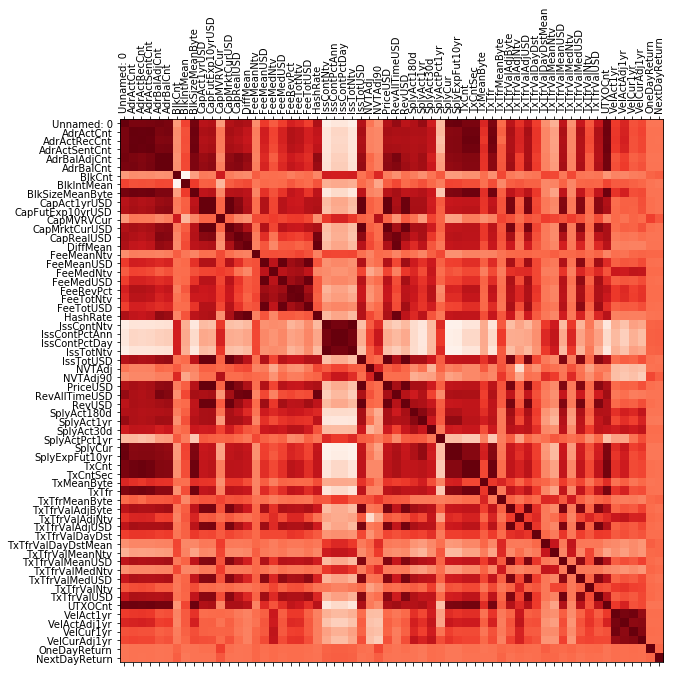

In [290]:
#profile = pdf.ProfileReport(btc_df)
corr = btc_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr, cmap=plt.cm.Reds)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns);

In [291]:
time_mask = (btc_df.index >= '1/1/2016')
masked_data = btc_df[time_mask]

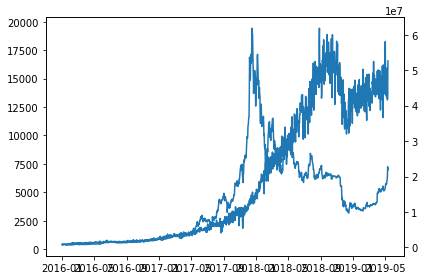

In [292]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(masked_data.index, masked_data['PriceUSD'])
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(masked_data.index, masked_data['HashRate'])
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

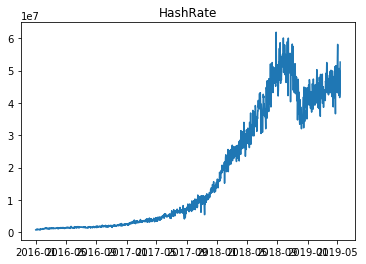

In [293]:
plt.plot(masked_data.index, masked_data['HashRate'])
plt.title('HashRate')
plt.show()

In [294]:
print('Max Return:')
print(btc_df.loc[btc_df['OneDayReturn'].idxmax()]['OneDayReturn'])
print('Min Return:')
print(btc_df.loc[btc_df['OneDayReturn'].idxmin()]['OneDayReturn'])

Max Return:
0.4585276392374609
Min Return:
-0.5267890104190889


In [295]:
def f(x):
    return np.cumprod(1 + x.values) - 1

#aggregate weekly and monthly returns data
btc_returns_monthly = btc_df[['OneDayReturn']]
#btc_returns_monthly.set_index('times', inplace=True)
#btc_returns_monthly.index = pd.to_datetime(btc_returns_monthly.index)
btc_returns_monthly = btc_returns_monthly.resample('1M').agg(lambda x: (x + 1).prod() - 1)
btc_returns_monthly.head()

,OneDayReturn
times,
2010-10-31 00:00:00+00:00,0.833333
2010-11-30 00:00:00+00:00,0.088312
2010-12-31 00:00:00+00:00,0.431981
2011-01-31 00:00:00+00:00,0.815903
2011-02-28 00:00:00+00:00,0.560656


In [296]:
#aggregate weekly and monthly returns data
btc_returns_weekly = btc_df[['OneDayReturn']]
#btc_returns_weekly.set_index('times', inplace=True)
#btc_returns_weekly.index = pd.to_datetime(btc_returns_weekly.index)
btc_returns_weekly = btc_returns_weekly.resample('1W').agg(lambda x: (x + 1).prod() - 1)
btc_returns_weekly.head()

,OneDayReturn
times,
2010-10-17 00:00:00+00:00,-0.028571
2010-10-24 00:00:00+00:00,0.127549
2010-10-31 00:00:00+00:00,0.673767
2010-11-07 00:00:00+00:00,0.766234
2010-11-14 00:00:00+00:00,-0.179294


In [297]:
btc_df['OneDayReturn'].head(30)

times
2010-10-16 00:00:00+00:00   -0.038095
2010-10-17 00:00:00+00:00    0.009901
2010-10-18 00:00:00+00:00    0.003922
2010-10-19 00:00:00+00:00   -0.052734
2010-10-20 00:00:00+00:00    0.020619
2010-10-21 00:00:00+00:00    0.080808
2010-10-22 00:00:00+00:00   -0.009346
2010-10-23 00:00:00+00:00    0.018868
2010-10-24 00:00:00+00:00    0.064907
2010-10-25 00:00:00+00:00    0.147726
2010-10-26 00:00:00+00:00    0.143939
2010-10-27 00:00:00+00:00    0.243046
2010-10-28 00:00:00+00:00   -0.077784
2010-10-29 00:00:00+00:00    0.097631
2010-10-30 00:00:00+00:00    0.046842
2010-10-31 00:00:00+00:00   -0.032177
2010-11-01 00:00:00+00:00    0.015584
2010-11-02 00:00:00+00:00   -0.008696
2010-11-03 00:00:00+00:00    0.025800
2010-11-04 00:00:00+00:00    0.059834
2010-11-05 00:00:00+00:00    0.234011
2010-11-06 00:00:00+00:00    0.439597
2010-11-07 00:00:00+00:00   -0.091626
2010-11-08 00:00:00+00:00   -0.285294
2010-11-09 00:00:00+00:00   -0.135802
2010-11-10 00:00:00+00:00    0.124762
2010-1

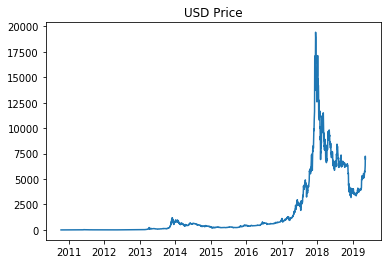

In [298]:
plt.plot(btc_df.index, btc_df['PriceUSD'])
plt.title('USD Price')
plt.show()

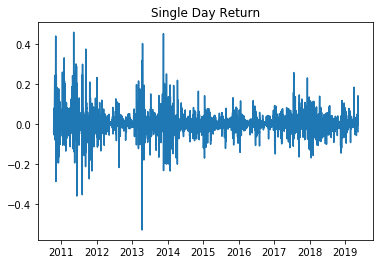

In [299]:
plt.plot(btc_df.index, btc_df['OneDayReturn'])
plt.title('Single Day Return')
plt.show()

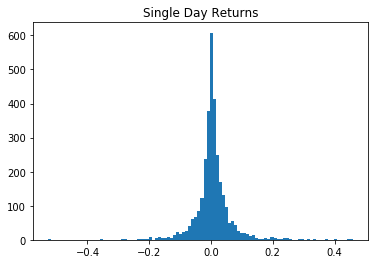

In [300]:
plt.hist(x = btc_df['OneDayReturn'], bins = 100)
plt.title('Single Day Returns')
plt.show()

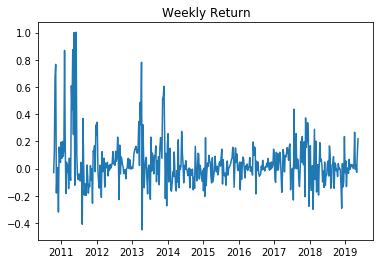

In [301]:
plt.plot(btc_returns_weekly['OneDayReturn'])
plt.title('Weekly Return')
plt.show()

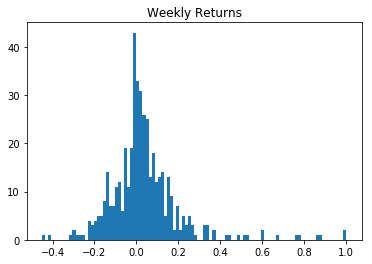

In [302]:
plt.hist(x = btc_returns_weekly['OneDayReturn'], bins = 100)
plt.title('Weekly Returns')
plt.show()

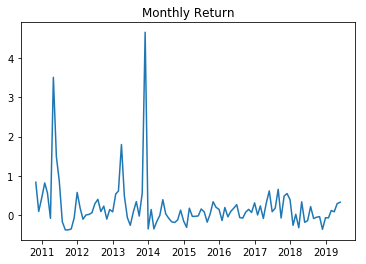

In [303]:
plt.plot(btc_returns_monthly['OneDayReturn'])
plt.title('Monthly Return')
plt.show()

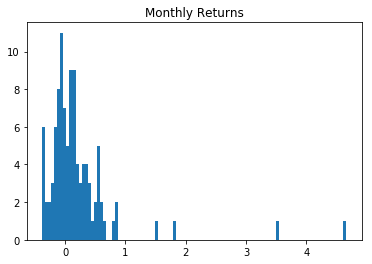

In [304]:
plt.hist(x = btc_returns_monthly['OneDayReturn'], bins = 100)
plt.title('Monthly Returns')
plt.show()

In [305]:
time_mask = (btc_df.index == btc_df.index) #(btc_df['times'] >= '1/1/2017') & (btc_df['times'] <= '12/10/2017')
btc_df[time_mask]['OneDayReturn'].describe()

count    3131.000000
mean        0.005156
std         0.056794
min        -0.526789
25%        -0.013969
50%         0.002219
75%         0.022183
max         0.458528
Name: OneDayReturn, dtype: float64

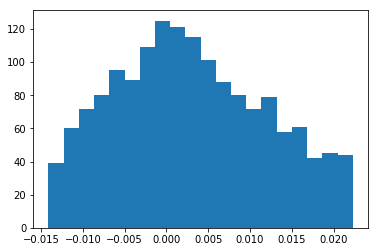

In [306]:
mid_mask = (btc_df['OneDayReturn'] >= -0.014159) & (btc_df['OneDayReturn'] <= 0.022324)
mid_data = btc_df[mid_mask]
mid_data.shape
plt.hist(x = mid_data['OneDayReturn'], bins = 20)
plt.show()

In [364]:
def regression(X, y):
    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    return model.summary()

In [308]:
def forwardRollingWindowReturns(windowSize):
    def cumulativeReturnsHelper(x):
        future_returns = x[::-1][1:]
        return (future_returns + 1).prod() - 1
    
    return btc_df['OneDayReturn'].iloc[::-1].rolling(windowSize + 1).apply(cumulativeReturnsHelper)



In [309]:
btc_df['Next7DayReturn'] = forwardRollingWindowReturns(7)
btc_df[['OneDayReturn', 'Next7DayReturn']].tail(15)

C:\anaconda\envs\scrapingEnv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


,OneDayReturn,Next7DayReturn
times,,
2019-04-28 00:00:00+00:00,-0.002296,0.108465
2019-04-29 00:00:00+00:00,-0.001954,0.104294
2019-04-30 00:00:00+00:00,0.023432,0.091288
2019-05-01 00:00:00+00:00,0.010797,0.115507
2019-05-02 00:00:00+00:00,0.012359,0.140329
2019-05-03 00:00:00+00:00,0.049691,0.121075
2019-05-04 00:00:00+00:00,0.020282,0.254650
2019-05-05 00:00:00+00:00,-0.009780,0.220173
2019-05-06 00:00:00+00:00,-0.005709,NaN


In [310]:
btc_df['Next30DayReturn'] = forwardRollingWindowReturns(30)
btc_df[['OneDayReturn', 'Next30DayReturn']].tail(40)

C:\anaconda\envs\scrapingEnv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


,OneDayReturn,Next30DayReturn
times,,
2019-04-03 00:00:00+00:00,0.014071,0.138720
2019-04-04 00:00:00+00:00,-0.013611,0.177848
2019-04-05 00:00:00+00:00,0.027754,0.134833
2019-04-06 00:00:00+00:00,0.000346,0.127964
2019-04-07 00:00:00+00:00,0.030019,0.107551
2019-04-08 00:00:00+00:00,0.019568,0.122392
2019-04-09 00:00:00+00:00,-0.018423,0.183348
2019-04-10 00:00:00+00:00,0.023486,0.193154
2019-04-11 00:00:00+00:00,-0.051051,0.435694


C:\anaconda\envs\scrapingEnv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\anaconda\envs\scrapingEnv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


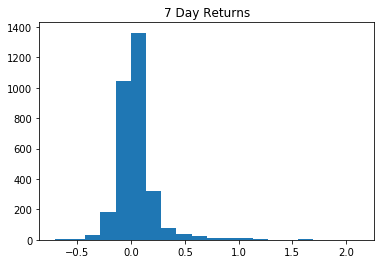

In [311]:
plt.hist(x = btc_df['Next7DayReturn'], bins = 20)
plt.title('7 Day Returns')
plt.show()

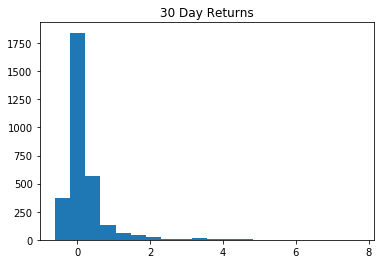

In [312]:
plt.hist(x = btc_df['Next30DayReturn'], bins = 20)
plt.title('30 Day Returns')
plt.show()

In [375]:
quantile_rank = .1
print('Weekly (start of week) abnormal returns')
print(f"High: {btc_returns_weekly['OneDayReturn'].quantile(1-quantile_rank)}")
print(f"Low: {btc_returns_weekly['OneDayReturn'].quantile(quantile_rank)}")
print('Monthly (start of month) abnormal returns')
print(f"High: {btc_returns_monthly['OneDayReturn'].quantile(1-quantile_rank)}")
print(f"Low: {btc_returns_monthly['OneDayReturn'].quantile(quantile_rank)}")

Weekly (start of week) abnormal returns
High: 0.1962088854716057
Low: -0.13698833551280132
Monthly (start of month) abnormal returns
High: 0.5696378238014642
Low: -0.19340094332167473


In [376]:
print('7 Day abnormal returns')
print(f"High: {btc_df['Next7DayReturn'].quantile(1-quantile_rank)}")
print(f"Low: {btc_df['Next7DayReturn'].quantile(quantile_rank)}")
print('30 Day abnormal returns')
print(f"High: {btc_df['Next30DayReturn'].quantile(1-quantile_rank)}")
print(f"Low: {btc_df['Next30DayReturn'].quantile(quantile_rank)}")

7 Day abnormal returns
High: 0.19808907336380546
Low: -0.12362475176202337
30 Day abnormal returns
High: 0.6535251386860972
Low: -0.2204062273152716


In [398]:
btc_df['OneDayReturn'].max()

0.4585276392374609

In [379]:
btc_df['Abnormal7DayReturnLong'] = btc_df['Next7DayReturn'] >= btc_df['Next7DayReturn'].quantile(1-quantile_rank)
btc_df['Abnormal7DayReturnShort'] = btc_df['Next7DayReturn'] <= btc_df['Next7DayReturn'].quantile(quantile_rank)

btc_df['Abnormal30DayReturnLong'] = btc_df['Next30DayReturn'] >= btc_df['Next30DayReturn'].quantile(1-quantile_rank)
btc_df['Abnormal30DayReturnShort'] = btc_df['Next30DayReturn'] <= btc_df['Next30DayReturn'].quantile(quantile_rank)

btc_df['Next7DayReturnDirection'] = abs(btc_df['Next7DayReturn'])/btc_df['Next7DayReturn'] == 1
btc_df['Next30DayReturnDirection'] = abs(btc_df['Next30DayReturn'])/btc_df['Next30DayReturn'] == 1

btc_df[['OneDayReturn', 'Next7DayReturn', 'Next30DayReturn', 'Abnormal7DayReturnLong', 'Abnormal7DayReturnShort', 'Abnormal30DayReturnLong', 'Abnormal30DayReturnShort', 'Next7DayReturnDirection', 'Next30DayReturnDirection']].tail(10)

,OneDayReturn,Next7DayReturn,Next30DayReturn,Abnormal7DayReturnLong,Abnormal7DayReturnShort,Abnormal30DayReturnLong,Abnormal30DayReturnShort,Next7DayReturnDirection,Next30DayReturnDirection
times,,,,,,,,,
2019-05-03 00:00:00+00:00,0.049691,0.121075,NaN,False,False,False,False,True,False
2019-05-04 00:00:00+00:00,0.020282,0.254650,NaN,True,False,False,False,True,False
2019-05-05 00:00:00+00:00,-0.009780,0.220173,NaN,True,False,False,False,True,False
2019-05-06 00:00:00+00:00,-0.005709,NaN,NaN,False,False,False,False,False,False
2019-05-07 00:00:00+00:00,0.011378,NaN,NaN,False,False,False,False,False,False
2019-05-08 00:00:00+00:00,0.033230,NaN,NaN,False,False,False,False,False,False
2019-05-09 00:00:00+00:00,0.034885,NaN,NaN,False,False,False,False,False,False
2019-05-10 00:00:00+00:00,0.031967,NaN,NaN,False,False,False,False,False,False
2019-05-11 00:00:00+00:00,0.141848,NaN,NaN,False,False,False,False,False,False


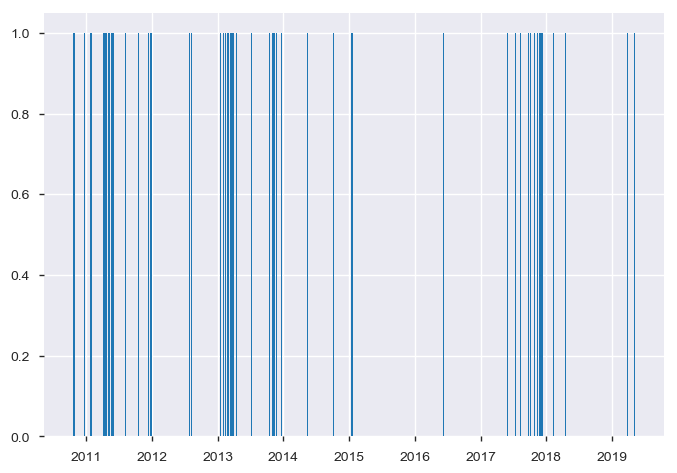

In [380]:
plt.bar(btc_df.index, btc_df['Abnormal7DayReturnLong'], width=1.2)
plt.show()

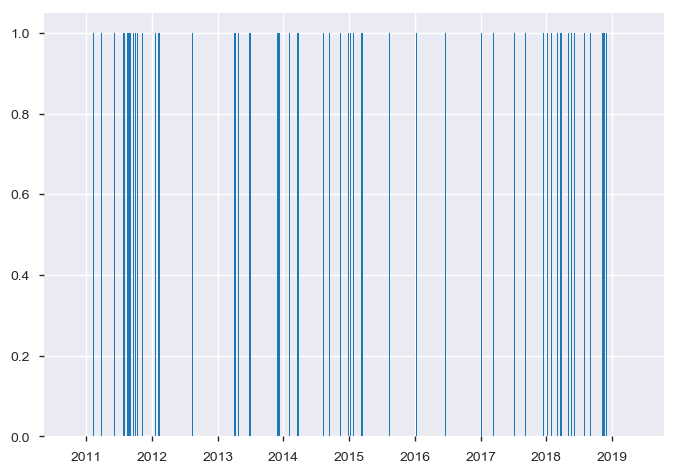

In [381]:
plt.bar(btc_df.index, btc_df['Abnormal7DayReturnShort'], width=1.2)
plt.show()

In [345]:
for i in range(7):
    btc_df[f'OneDayReturn_lag{i+1}'] = btc_df['OneDayReturn'].shift(i+1)

In [356]:
features = []
for i in range(7):
    features.append(f'OneDayReturn_lag{i+1}')
print(features)
target = 'Next30DayReturnDirection'
model_df = btc_df[features + [target]]
model_df = model_df.dropna()
train_test_split_date = '7/1/2018'
train_test_split_mask = model_df.index < train_test_split_date
train_df = model_df[train_test_split_mask]
test_df = model_df[~train_test_split_mask]
train_df_features = train_df[features]
train_df_target = train_df[target]
test_df_features = test_df[features]
test_df_target = test_df[target]

['OneDayReturn_lag1', 'OneDayReturn_lag2', 'OneDayReturn_lag3', 'OneDayReturn_lag4', 'OneDayReturn_lag5', 'OneDayReturn_lag6', 'OneDayReturn_lag7']


,OneDayReturn_lag1,OneDayReturn_lag2,OneDayReturn_lag3,OneDayReturn_lag4,OneDayReturn_lag5,OneDayReturn_lag6,OneDayReturn_lag7,Next30DayReturnDirection
times,,,,,,,,
2010-10-23 00:00:00+00:00,-0.009346,0.080808,0.020619,-0.052734,0.003922,0.009901,-0.038095,True
2010-10-24 00:00:00+00:00,0.018868,-0.009346,0.080808,0.020619,-0.052734,0.003922,0.009901,True
2010-10-25 00:00:00+00:00,0.064907,0.018868,-0.009346,0.080808,0.020619,-0.052734,0.003922,True
2010-10-26 00:00:00+00:00,0.147726,0.064907,0.018868,-0.009346,0.080808,0.020619,-0.052734,True
2010-10-27 00:00:00+00:00,0.143939,0.147726,0.064907,0.018868,-0.009346,0.080808,0.020619,True


In [358]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(train_df_features, train_df_target)
preds = logisticRegr.predict(test_df_features)
logisticRegr.score(test_df_features, test_df_target)

C:\anaconda\envs\scrapingEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.439873417721519

In [386]:
from sklearn.metrics import confusion_matrix, auc
# TN FP
# FN TP
confusion_matrix(test_df_target, preds)

array([[  0, 177],
       [  0, 139]], dtype=int64)

(0, 1)

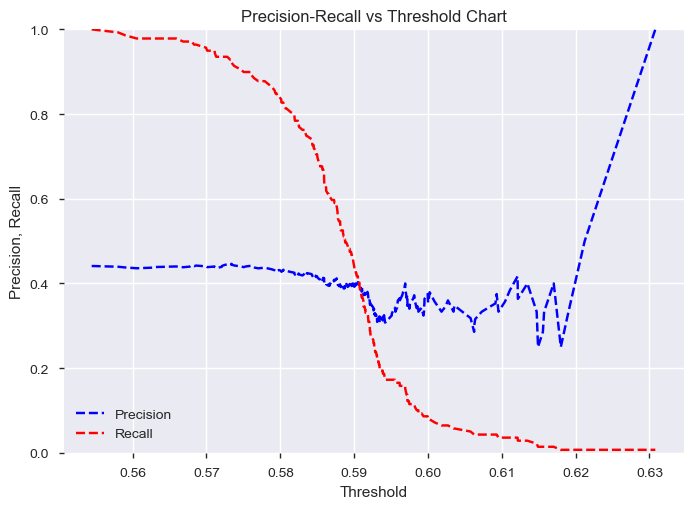

In [387]:
pred_y=logisticRegr.predict(test_df_features) 

probs_y=logisticRegr.predict_proba(test_df_features) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first 
  #column of 
  #array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(test_df_target, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [365]:
regression(model_df[features], model_df[target])

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Next30DayReturnDirection   R-squared:                   -1731.132
Model:                                  OLS   Adj. R-squared:              -1735.021
Method:                       Least Squares   F-statistic:                    -445.0
Date:                      Sun, 02 Jun 2019   Prob (F-statistic):               1.00
Time:                              21:15:41   Log-Likelihood:                -3511.6
No. Observations:                      3124   AIC:                             7037.
Df Residuals:                          3117   BIC:                             7079.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
OneDayReturn_lag1     0.8901      0.236      3.769      0.000       0.427       1.353
OneDayReturn_lag2     1.0440      0.236      4.425      0.000       0.581       1.507
OneDayReturn_lag3     1.0041      0.234      4.284      0.000       0.544       1.464
OneDayReturn_lag4     1.0331      0.234      4.408      0.000       0.574       1.493
OneDayReturn_lag5     0.9952      0.234      4.246      0.000       0.536       1.455
OneDayReturn_lag6     0.7869      0.236      3.335      0.001       0.324       1.250
OneDayReturn_lag7     0.8417      0.236      3.562      0.000       0.378       1.305
==============================================================================
Omnibus:                    21339.169   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.983
Skew:                          -0.336   Prob(JB):                     3.33e-75
Kurtosis:                       1.523   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
#pdf.ProfileReport(btc_df)